In [2]:
import numpy as np
import torch
from functools import reduce
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
torch.__version__

'2.1.1+cpu'

In [4]:
np.random.seed(1943)
torch.manual_seed(1943)

In [5]:
# setosa: (1,0,0)
# versicolor: (0,1,0)
# virginica: (0,0,1)
# Sepal length, Sepal width, Petal length, Petal width
iris = [((5.1, 3.5, 1.4, 0.2), (1, 0, 0)),
        ((4.9, 3.0, 1.4, 0.2), (1, 0, 0)),
        ((4.7, 3.2, 1.3, 0.2), (1, 0, 0)),
        ((4.6, 3.1, 1.5, 0.2), (1, 0, 0)),
        ((5.0, 3.6, 1.4, 0.2), (1, 0, 0)),
        ((5.4, 3.9, 1.7, 0.4), (1, 0, 0)),
        ((4.6, 3.4, 1.4, 0.3), (1, 0, 0)),
        ((5.0, 3.4, 1.5, 0.2), (1, 0, 0)),
        ((4.4, 2.9, 1.4, 0.2), (1, 0, 0)),
        ((4.9, 3.1, 1.5, 0.1), (1, 0, 0)),
        ((5.4, 3.7, 1.5, 0.2), (1, 0, 0)),
        ((4.8, 3.4, 1.6, 0.2), (1, 0, 0)),
        ((4.8, 3.0, 1.4, 0.1), (1, 0, 0)),
        ((4.3, 3.0, 1.1, 0.1), (1, 0, 0)),
        ((5.8, 4.0, 1.2, 0.2), (1, 0, 0)),
        ((5.7, 4.4, 1.5, 0.4), (1, 0, 0)),
        ((5.4, 3.9, 1.3, 0.4), (1, 0, 0)),
        ((5.1, 3.5, 1.4, 0.3), (1, 0, 0)),
        ((5.7, 3.8, 1.7, 0.3), (1, 0, 0)),
        ((5.1, 3.8, 1.5, 0.3), (1, 0, 0)),
        ((5.4, 3.4, 1.7, 0.2), (1, 0, 0)),
        ((5.1, 3.7, 1.5, 0.4), (1, 0, 0)),
        ((4.6, 3.6, 1.0, 0.2), (1, 0, 0)),
        ((5.1, 3.3, 1.7, 0.5), (1, 0, 0)),
        ((4.8, 3.4, 1.9, 0.2), (1, 0, 0)),
        ((5.0, 3.0, 1.6, 0.2), (1, 0, 0)),
        ((5.0, 3.4, 1.6, 0.4), (1, 0, 0)),
        ((5.2, 3.5, 1.5, 0.2), (1, 0, 0)),
        ((5.2, 3.4, 1.4, 0.2), (1, 0, 0)),
        ((4.7, 3.2, 1.6, 0.2), (1, 0, 0)),
        ((4.8, 3.1, 1.6, 0.2), (1, 0, 0)),
        ((5.4, 3.4, 1.5, 0.4), (1, 0, 0)),
        ((5.2, 4.1, 1.5, 0.1), (1, 0, 0)),
        ((5.5, 4.2, 1.4, 0.2), (1, 0, 0)),
        ((4.9, 3.1, 1.5, 0.1), (1, 0, 0)),
        ((5.0, 3.2, 1.2, 0.2), (1, 0, 0)),
        ((5.5, 3.5, 1.3, 0.2), (1, 0, 0)),
        ((4.9, 3.1, 1.5, 0.1), (1, 0, 0)),
        ((4.4, 3.0, 1.3, 0.2), (1, 0, 0)),
        ((5.1, 3.4, 1.5, 0.2), (1, 0, 0)),
        ((5.0, 3.5, 1.3, 0.3), (1, 0, 0)),
        ((4.5, 2.3, 1.3, 0.3), (1, 0, 0)),
        ((4.4, 3.2, 1.3, 0.2), (1, 0, 0)),
        ((5.0, 3.5, 1.6, 0.6), (1, 0, 0)),
        ((5.1, 3.8, 1.9, 0.4), (1, 0, 0)),
        ((4.8, 3.0, 1.4, 0.3), (1, 0, 0)),
        ((5.1, 3.8, 1.6, 0.2), (1, 0, 0)),
        ((4.6, 3.2, 1.4, 0.2), (1, 0, 0)),
        ((5.3, 3.7, 1.5, 0.2), (1, 0, 0)),
        ((5.0, 3.3, 1.4, 0.2), (1, 0, 0)),
        ((7.0, 3.2, 4.7, 1.4), (0, 1, 0)),
        ((6.4, 3.2, 4.5, 1.5), (0, 1, 0)),
        ((6.9, 3.1, 4.9, 1.5), (0, 1, 0)),
        ((5.5, 2.3, 4.0, 1.3), (0, 1, 0)),
        ((6.5, 2.8, 4.6, 1.5), (0, 1, 0)),
        ((5.7, 2.8, 4.5, 1.3), (0, 1, 0)),
        ((6.3, 3.3, 4.7, 1.6), (0, 1, 0)),
        ((4.9, 2.4, 3.3, 1.0), (0, 1, 0)),
        ((6.6, 2.9, 4.6, 1.3), (0, 1, 0)),
        ((5.2, 2.7, 3.9, 1.4), (0, 1, 0)),
        ((5.0, 2.0, 3.5, 1.0), (0, 1, 0)),
        ((5.9, 3.0, 4.2, 1.5), (0, 1, 0)),
        ((6.0, 2.2, 4.0, 1.0), (0, 1, 0)),
        ((6.1, 2.9, 4.7, 1.4), (0, 1, 0)),
        ((5.6, 2.9, 3.6, 1.3), (0, 1, 0)),
        ((6.7, 3.1, 4.4, 1.4), (0, 1, 0)),
        ((5.6, 3.0, 4.5, 1.5), (0, 1, 0)),
        ((5.8, 2.7, 4.1, 1.0), (0, 1, 0)),
        ((6.2, 2.2, 4.5, 1.5), (0, 1, 0)),
        ((5.6, 2.5, 3.9, 1.1), (0, 1, 0)),
        ((5.9, 3.2, 4.8, 1.8), (0, 1, 0)),
        ((6.1, 2.8, 4.0, 1.3), (0, 1, 0)),
        ((6.3, 2.5, 4.9, 1.5), (0, 1, 0)),
        ((6.1, 2.8, 4.7, 1.2), (0, 1, 0)),
        ((6.4, 2.9, 4.3, 1.3), (0, 1, 0)),
        ((6.6, 3.0, 4.4, 1.4), (0, 1, 0)),
        ((6.8, 2.8, 4.8, 1.4), (0, 1, 0)),
        ((6.7, 3.0, 5.0, 1.7), (0, 1, 0)),
        ((6.0, 2.9, 4.5, 1.5), (0, 1, 0)),
        ((5.7, 2.6, 3.5, 1.0), (0, 1, 0)),
        ((5.5, 2.4, 3.8, 1.1), (0, 1, 0)),
        ((5.5, 2.4, 3.7, 1.0), (0, 1, 0)),
        ((5.8, 2.7, 3.9, 1.2), (0, 1, 0)),
        ((6.0, 2.7, 5.1, 1.6), (0, 1, 0)),
        ((5.4, 3.0, 4.5, 1.5), (0, 1, 0)),
        ((6.0, 3.4, 4.5, 1.6), (0, 1, 0)),
        ((6.7, 3.1, 4.7, 1.5), (0, 1, 0)),
        ((6.3, 2.3, 4.4, 1.3), (0, 1, 0)),
        ((5.6, 3.0, 4.1, 1.3), (0, 1, 0)),
        ((5.5, 2.5, 4.0, 1.3), (0, 1, 0)),
        ((5.5, 2.6, 4.4, 1.2), (0, 1, 0)),
        ((6.1, 3.0, 4.6, 1.4), (0, 1, 0)),
        ((5.8, 2.6, 4.0, 1.2), (0, 1, 0)),
        ((5.0, 2.3, 3.3, 1.0), (0, 1, 0)),
        ((5.6, 2.7, 4.2, 1.3), (0, 1, 0)),
        ((5.7, 3.0, 4.2, 1.2), (0, 1, 0)),
        ((5.7, 2.9, 4.2, 1.3), (0, 1, 0)),
        ((6.2, 2.9, 4.3, 1.3), (0, 1, 0)),
        ((5.1, 2.5, 3.0, 1.1), (0, 1, 0)),
        ((5.7, 2.8, 4.1, 1.3), (0, 1, 0)),
        ((6.3, 3.3, 6.0, 2.5), (0, 0, 1)),
        ((5.8, 2.7, 5.1, 1.9), (0, 0, 1)),
        ((7.1, 3.0, 5.9, 2.1), (0, 0, 1)),
        ((6.3, 2.9, 5.6, 1.8), (0, 0, 1)),
        ((6.5, 3.0, 5.8, 2.2), (0, 0, 1)),
        ((7.6, 3.0, 6.6, 2.1), (0, 0, 1)),
        ((4.9, 2.5, 4.5, 1.7), (0, 0, 1)),
        ((7.3, 2.9, 6.3, 1.8), (0, 0, 1)),
        ((6.7, 2.5, 5.8, 1.8), (0, 0, 1)),
        ((7.2, 3.6, 6.1, 2.5), (0, 0, 1)),
        ((6.5, 3.2, 5.1, 2.0), (0, 0, 1)),
        ((6.4, 2.7, 5.3, 1.9), (0, 0, 1)),
        ((6.8, 3.0, 5.5, 2.1), (0, 0, 1)),
        ((5.7, 2.5, 5.0, 2.0), (0, 0, 1)),
        ((5.8, 2.8, 5.1, 2.4), (0, 0, 1)),
        ((6.4, 3.2, 5.3, 2.3), (0, 0, 1)),
        ((6.5, 3.0, 5.5, 1.8), (0, 0, 1)),
        ((7.7, 3.8, 6.7, 2.2), (0, 0, 1)),
        ((7.7, 2.6, 6.9, 2.3), (0, 0, 1)),
        ((6.0, 2.2, 5.0, 1.5), (0, 0, 1)),
        ((6.9, 3.2, 5.7, 2.3), (0, 0, 1)),
        ((5.6, 2.8, 4.9, 2.0), (0, 0, 1)),
        ((7.7, 2.8, 6.7, 2.0), (0, 0, 1)),
        ((6.3, 2.7, 4.9, 1.8), (0, 0, 1)),
        ((6.7, 3.3, 5.7, 2.1), (0, 0, 1)),
        ((7.2, 3.2, 6.0, 1.8), (0, 0, 1)),
        ((6.2, 2.8, 4.8, 1.8), (0, 0, 1)),
        ((6.1, 3.0, 4.9, 1.8), (0, 0, 1)),
        ((6.4, 2.8, 5.6, 2.1), (0, 0, 1)),
        ((7.2, 3.0, 5.8, 1.6), (0, 0, 1)),
        ((7.4, 2.8, 6.1, 1.9), (0, 0, 1)),
        ((7.9, 3.8, 6.4, 2.0), (0, 0, 1)),
        ((6.4, 2.8, 5.6, 2.2), (0, 0, 1)),
        ((6.3, 2.8, 5.1, 1.5), (0, 0, 1)),
        ((6.1, 2.6, 5.6, 1.4), (0, 0, 1)),
        ((7.7, 3.0, 6.1, 2.3), (0, 0, 1)),
        ((6.3, 3.4, 5.6, 2.4), (0, 0, 1)),
        ((6.4, 3.1, 5.5, 1.8), (0, 0, 1)),
        ((6.0, 3.0, 4.8, 1.8), (0, 0, 1)),
        ((6.9, 3.1, 5.4, 2.1), (0, 0, 1)),
        ((6.7, 3.1, 5.6, 2.4), (0, 0, 1)),
        ((6.9, 3.1, 5.1, 2.3), (0, 0, 1)),
        ((5.8, 2.7, 5.1, 1.9), (0, 0, 1)),
        ((6.8, 3.2, 5.9, 2.3), (0, 0, 1)),
        ((6.7, 3.3, 5.7, 2.5), (0, 0, 1)),
        ((6.7, 3.0, 5.2, 2.3), (0, 0, 1)),
        ((6.3, 2.5, 5.0, 1.9), (0, 0, 1)),
        ((6.5, 3.0, 5.2, 2.0), (0, 0, 1)),
        ((6.2, 3.4, 5.4, 2.3), (0, 0, 1)),
        ((5.9, 3.0, 5.1, 1.8), (0, 0, 1))]

feature = np.vstack([np.array(i[0]) for i in iris])
label = np.vstack([np.array(i[1]) for i in iris])

_x = feature[:, 2:4]  # use "Petal length" and "Petal width" only
_y = label
d = _x.shape[1]

x = torch.from_numpy(_x.astype(np.float32))
y = torch.from_numpy(np.argmax(_y, axis=1))

In [6]:
def torch_kron_prod(a, b):
    res = torch.einsum('ij,ik->ijk', [a, b])
    res = torch.reshape(res, [-1, np.prod(res.shape[1:])])
    return res

In [7]:
def torch_bin(x, cut_points, temperature=0.1):
    # x is a N-by-1 matrix (column vector)
    # cut_points is a D-dim vector (D is the number of cut-points)
    # this function produces a N-by-(D+1) matrix, each row has only one element being one and the rest are all zeros
    D = cut_points.shape[0]
    W = torch.reshape(torch.linspace(1.0, D + 1.0, D + 1), [1, -1])
    cut_points, _ = torch.sort(cut_points)  # make sure cut_points is monotonically increasing
    b = torch.cumsum(torch.cat([torch.zeros([1]), -cut_points], 0),0)
    h = torch.matmul(x, W) + b
    res = torch.exp(h-torch.max(h))
    res = res/torch.sum(res, dim=-1, keepdim=True)
    return h

In [8]:
def nn_decision_tree(x, cut_points_list, leaf_score, temperature=0.1):
    # cut_points_list contains the cut_points for each dimension of feature
    leaf = reduce(torch_kron_prod,
                  map(lambda z: torch_bin(x[:, z[0]:z[0] + 1], z[1], temperature), enumerate(cut_points_list)))
    return torch.matmul(leaf, leaf_score)

In [9]:
num_cut = [1, 1]  # "Petal length" and "Petal width"
num_leaf = np.prod(np.array(num_cut) + 1)
num_class = 3

In [10]:
cut_points_list = [torch.rand([i], requires_grad=True) for i in num_cut]

In [11]:
leaf_score = torch.rand([num_leaf, num_class], requires_grad=True)

In [12]:
loss_function = torch.nn.CrossEntropyLoss()

In [13]:
optimizer = torch.optim.Adam(cut_points_list + [leaf_score], lr=0.01)

In [14]:
for i in range(1000):
    optimizer.zero_grad()
    y_pred = nn_decision_tree(x, cut_points_list, leaf_score, temperature=0.1)
    loss = loss_function(y_pred, y)
    loss.backward()
    optimizer.step()
    if i % 200 == 0:
        print(loss.detach().numpy())
print('error rate %.2f' % (1-np.mean(np.argmax(y_pred.detach().numpy(), axis=1)==np.argmax(_y, axis=1))))

7.0246735
0.6992948
0.16637158
0.13140528
0.12425867
error rate 0.04


In [15]:
sample_x0 = np.repeat(np.linspace(0, np.max(_x[:,0]), 100), 100).reshape(-1,1)
sample_x1 = np.tile(np.linspace(0, np.max(_x[:,1]), 100).reshape(-1,1), [100,1])
sample_x = np.hstack([sample_x0, sample_x1])
sample_y_pred = nn_decision_tree(torch.from_numpy(sample_x.astype(np.float32)), cut_points_list, leaf_score, temperature=0.1)
sample_label = np.argmax(sample_y_pred.detach().numpy(), axis=1)

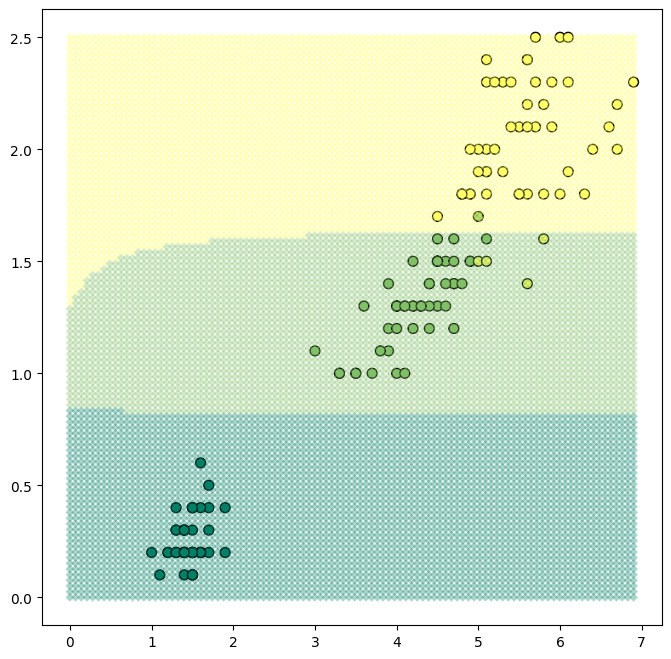

In [16]:
plt.figure(figsize=(8,8))

plt.scatter(_x[:,0], 
            _x[:,1], 
            c=np.argmax(_y, axis=1), 
            marker='o',
            s=50,
            cmap='summer', 
            edgecolors='black')

plt.scatter(sample_x0.flatten(), 
            sample_x1.flatten(), 
            c=sample_label.flatten(), 
            marker='D',
            s=20,
            cmap='summer', 
            edgecolors='none',
            alpha=0.33)

### Testing different features 


In [59]:
# setosa: (1,0,0)
# versicolor: (0,1,0)
# virginica: (0,0,1)
# Sepal length, Sepal width, Petal length, Petal width
iris = [((5.1, 3.5, 1.4, 0.2), (1, 0, 0)),
        ((4.9, 3.0, 1.4, 0.2), (1, 0, 0)),
        ((4.7, 3.2, 1.3, 0.2), (1, 0, 0)),
        ((4.6, 3.1, 1.5, 0.2), (1, 0, 0)),
        ((5.0, 3.6, 1.4, 0.2), (1, 0, 0)),
        ((5.4, 3.9, 1.7, 0.4), (1, 0, 0)),
        ((4.6, 3.4, 1.4, 0.3), (1, 0, 0)),
        ((5.0, 3.4, 1.5, 0.2), (1, 0, 0)),
        ((4.4, 2.9, 1.4, 0.2), (1, 0, 0)),
        ((4.9, 3.1, 1.5, 0.1), (1, 0, 0)),
        ((5.4, 3.7, 1.5, 0.2), (1, 0, 0)),
        ((4.8, 3.4, 1.6, 0.2), (1, 0, 0)),
        ((4.8, 3.0, 1.4, 0.1), (1, 0, 0)),
        ((4.3, 3.0, 1.1, 0.1), (1, 0, 0)),
        ((5.8, 4.0, 1.2, 0.2), (1, 0, 0)),
        ((5.7, 4.4, 1.5, 0.4), (1, 0, 0)),
        ((5.4, 3.9, 1.3, 0.4), (1, 0, 0)),
        ((5.1, 3.5, 1.4, 0.3), (1, 0, 0)),
        ((5.7, 3.8, 1.7, 0.3), (1, 0, 0)),
        ((5.1, 3.8, 1.5, 0.3), (1, 0, 0)),
        ((5.4, 3.4, 1.7, 0.2), (1, 0, 0)),
        ((5.1, 3.7, 1.5, 0.4), (1, 0, 0)),
        ((4.6, 3.6, 1.0, 0.2), (1, 0, 0)),
        ((5.1, 3.3, 1.7, 0.5), (1, 0, 0)),
        ((4.8, 3.4, 1.9, 0.2), (1, 0, 0)),
        ((5.0, 3.0, 1.6, 0.2), (1, 0, 0)),
        ((5.0, 3.4, 1.6, 0.4), (1, 0, 0)),
        ((5.2, 3.5, 1.5, 0.2), (1, 0, 0)),
        ((5.2, 3.4, 1.4, 0.2), (1, 0, 0)),
        ((4.7, 3.2, 1.6, 0.2), (1, 0, 0)),
        ((4.8, 3.1, 1.6, 0.2), (1, 0, 0)),
        ((5.4, 3.4, 1.5, 0.4), (1, 0, 0)),
        ((5.2, 4.1, 1.5, 0.1), (1, 0, 0)),
        ((5.5, 4.2, 1.4, 0.2), (1, 0, 0)),
        ((4.9, 3.1, 1.5, 0.1), (1, 0, 0)),
        ((5.0, 3.2, 1.2, 0.2), (1, 0, 0)),
        ((5.5, 3.5, 1.3, 0.2), (1, 0, 0)),
        ((4.9, 3.1, 1.5, 0.1), (1, 0, 0)),
        ((4.4, 3.0, 1.3, 0.2), (1, 0, 0)),
        ((5.1, 3.4, 1.5, 0.2), (1, 0, 0)),
        ((5.0, 3.5, 1.3, 0.3), (1, 0, 0)),
        ((4.5, 2.3, 1.3, 0.3), (1, 0, 0)),
        ((4.4, 3.2, 1.3, 0.2), (1, 0, 0)),
        ((5.0, 3.5, 1.6, 0.6), (1, 0, 0)),
        ((5.1, 3.8, 1.9, 0.4), (1, 0, 0)),
        ((4.8, 3.0, 1.4, 0.3), (1, 0, 0)),
        ((5.1, 3.8, 1.6, 0.2), (1, 0, 0)),
        ((4.6, 3.2, 1.4, 0.2), (1, 0, 0)),
        ((5.3, 3.7, 1.5, 0.2), (1, 0, 0)),
        ((5.0, 3.3, 1.4, 0.2), (1, 0, 0)),
        ((7.0, 3.2, 4.7, 1.4), (0, 1, 0)),
        ((6.4, 3.2, 4.5, 1.5), (0, 1, 0)),
        ((6.9, 3.1, 4.9, 1.5), (0, 1, 0)),
        ((5.5, 2.3, 4.0, 1.3), (0, 1, 0)),
        ((6.5, 2.8, 4.6, 1.5), (0, 1, 0)),
        ((5.7, 2.8, 4.5, 1.3), (0, 1, 0)),
        ((6.3, 3.3, 4.7, 1.6), (0, 1, 0)),
        ((4.9, 2.4, 3.3, 1.0), (0, 1, 0)),
        ((6.6, 2.9, 4.6, 1.3), (0, 1, 0)),
        ((5.2, 2.7, 3.9, 1.4), (0, 1, 0)),
        ((5.0, 2.0, 3.5, 1.0), (0, 1, 0)),
        ((5.9, 3.0, 4.2, 1.5), (0, 1, 0)),
        ((6.0, 2.2, 4.0, 1.0), (0, 1, 0)),
        ((6.1, 2.9, 4.7, 1.4), (0, 1, 0)),
        ((5.6, 2.9, 3.6, 1.3), (0, 1, 0)),
        ((6.7, 3.1, 4.4, 1.4), (0, 1, 0)),
        ((5.6, 3.0, 4.5, 1.5), (0, 1, 0)),
        ((5.8, 2.7, 4.1, 1.0), (0, 1, 0)),
        ((6.2, 2.2, 4.5, 1.5), (0, 1, 0)),
        ((5.6, 2.5, 3.9, 1.1), (0, 1, 0)),
        ((5.9, 3.2, 4.8, 1.8), (0, 1, 0)),
        ((6.1, 2.8, 4.0, 1.3), (0, 1, 0)),
        ((6.3, 2.5, 4.9, 1.5), (0, 1, 0)),
        ((6.1, 2.8, 4.7, 1.2), (0, 1, 0)),
        ((6.4, 2.9, 4.3, 1.3), (0, 1, 0)),
        ((6.6, 3.0, 4.4, 1.4), (0, 1, 0)),
        ((6.8, 2.8, 4.8, 1.4), (0, 1, 0)),
        ((6.7, 3.0, 5.0, 1.7), (0, 1, 0)),
        ((6.0, 2.9, 4.5, 1.5), (0, 1, 0)),
        ((5.7, 2.6, 3.5, 1.0), (0, 1, 0)),
        ((5.5, 2.4, 3.8, 1.1), (0, 1, 0)),
        ((5.5, 2.4, 3.7, 1.0), (0, 1, 0)),
        ((5.8, 2.7, 3.9, 1.2), (0, 1, 0)),
        ((6.0, 2.7, 5.1, 1.6), (0, 1, 0)),
        ((5.4, 3.0, 4.5, 1.5), (0, 1, 0)),
        ((6.0, 3.4, 4.5, 1.6), (0, 1, 0)),
        ((6.7, 3.1, 4.7, 1.5), (0, 1, 0)),
        ((6.3, 2.3, 4.4, 1.3), (0, 1, 0)),
        ((5.6, 3.0, 4.1, 1.3), (0, 1, 0)),
        ((5.5, 2.5, 4.0, 1.3), (0, 1, 0)),
        ((5.5, 2.6, 4.4, 1.2), (0, 1, 0)),
        ((6.1, 3.0, 4.6, 1.4), (0, 1, 0)),
        ((5.8, 2.6, 4.0, 1.2), (0, 1, 0)),
        ((5.0, 2.3, 3.3, 1.0), (0, 1, 0)),
        ((5.6, 2.7, 4.2, 1.3), (0, 1, 0)),
        ((5.7, 3.0, 4.2, 1.2), (0, 1, 0)),
        ((5.7, 2.9, 4.2, 1.3), (0, 1, 0)),
        ((6.2, 2.9, 4.3, 1.3), (0, 1, 0)),
        ((5.1, 2.5, 3.0, 1.1), (0, 1, 0)),
        ((5.7, 2.8, 4.1, 1.3), (0, 1, 0)),
        ((6.3, 3.3, 6.0, 2.5), (0, 0, 1)),
        ((5.8, 2.7, 5.1, 1.9), (0, 0, 1)),
        ((7.1, 3.0, 5.9, 2.1), (0, 0, 1)),
        ((6.3, 2.9, 5.6, 1.8), (0, 0, 1)),
        ((6.5, 3.0, 5.8, 2.2), (0, 0, 1)),
        ((7.6, 3.0, 6.6, 2.1), (0, 0, 1)),
        ((4.9, 2.5, 4.5, 1.7), (0, 0, 1)),
        ((7.3, 2.9, 6.3, 1.8), (0, 0, 1)),
        ((6.7, 2.5, 5.8, 1.8), (0, 0, 1)),
        ((7.2, 3.6, 6.1, 2.5), (0, 0, 1)),
        ((6.5, 3.2, 5.1, 2.0), (0, 0, 1)),
        ((6.4, 2.7, 5.3, 1.9), (0, 0, 1)),
        ((6.8, 3.0, 5.5, 2.1), (0, 0, 1)),
        ((5.7, 2.5, 5.0, 2.0), (0, 0, 1)),
        ((5.8, 2.8, 5.1, 2.4), (0, 0, 1)),
        ((6.4, 3.2, 5.3, 2.3), (0, 0, 1)),
        ((6.5, 3.0, 5.5, 1.8), (0, 0, 1)),
        ((7.7, 3.8, 6.7, 2.2), (0, 0, 1)),
        ((7.7, 2.6, 6.9, 2.3), (0, 0, 1)),
        ((6.0, 2.2, 5.0, 1.5), (0, 0, 1)),
        ((6.9, 3.2, 5.7, 2.3), (0, 0, 1)),
        ((5.6, 2.8, 4.9, 2.0), (0, 0, 1)),
        ((7.7, 2.8, 6.7, 2.0), (0, 0, 1)),
        ((6.3, 2.7, 4.9, 1.8), (0, 0, 1)),
        ((6.7, 3.3, 5.7, 2.1), (0, 0, 1)),
        ((7.2, 3.2, 6.0, 1.8), (0, 0, 1)),
        ((6.2, 2.8, 4.8, 1.8), (0, 0, 1)),
        ((6.1, 3.0, 4.9, 1.8), (0, 0, 1)),
        ((6.4, 2.8, 5.6, 2.1), (0, 0, 1)),
        ((7.2, 3.0, 5.8, 1.6), (0, 0, 1)),
        ((7.4, 2.8, 6.1, 1.9), (0, 0, 1)),
        ((7.9, 3.8, 6.4, 2.0), (0, 0, 1)),
        ((6.4, 2.8, 5.6, 2.2), (0, 0, 1)),
        ((6.3, 2.8, 5.1, 1.5), (0, 0, 1)),
        ((6.1, 2.6, 5.6, 1.4), (0, 0, 1)),
        ((7.7, 3.0, 6.1, 2.3), (0, 0, 1)),
        ((6.3, 3.4, 5.6, 2.4), (0, 0, 1)),
        ((6.4, 3.1, 5.5, 1.8), (0, 0, 1)),
        ((6.0, 3.0, 4.8, 1.8), (0, 0, 1)),
        ((6.9, 3.1, 5.4, 2.1), (0, 0, 1)),
        ((6.7, 3.1, 5.6, 2.4), (0, 0, 1)),
        ((6.9, 3.1, 5.1, 2.3), (0, 0, 1)),
        ((5.8, 2.7, 5.1, 1.9), (0, 0, 1)),
        ((6.8, 3.2, 5.9, 2.3), (0, 0, 1)),
        ((6.7, 3.3, 5.7, 2.5), (0, 0, 1)),
        ((6.7, 3.0, 5.2, 2.3), (0, 0, 1)),
        ((6.3, 2.5, 5.0, 1.9), (0, 0, 1)),
        ((6.5, 3.0, 5.2, 2.0), (0, 0, 1)),
        ((6.2, 3.4, 5.4, 2.3), (0, 0, 1)),
        ((5.9, 3.0, 5.1, 1.8), (0, 0, 1))]

feature = np.vstack([np.array(i[0]) for i in iris])
label = np.vstack([np.array(i[1]) for i in iris])

_x = feature[:, 1:3]  # use "Petal length" and "Petal width" only
_y = label
d = _x.shape[1]

x = torch.from_numpy(_x.astype(np.float32))
y = torch.from_numpy(np.argmax(_y, axis=1))

### Implementing other accuracy metrics, evaluating with different learning rates the outcome


LR: 0.01, Error Rate: 0.05, F1 Score: 0.95


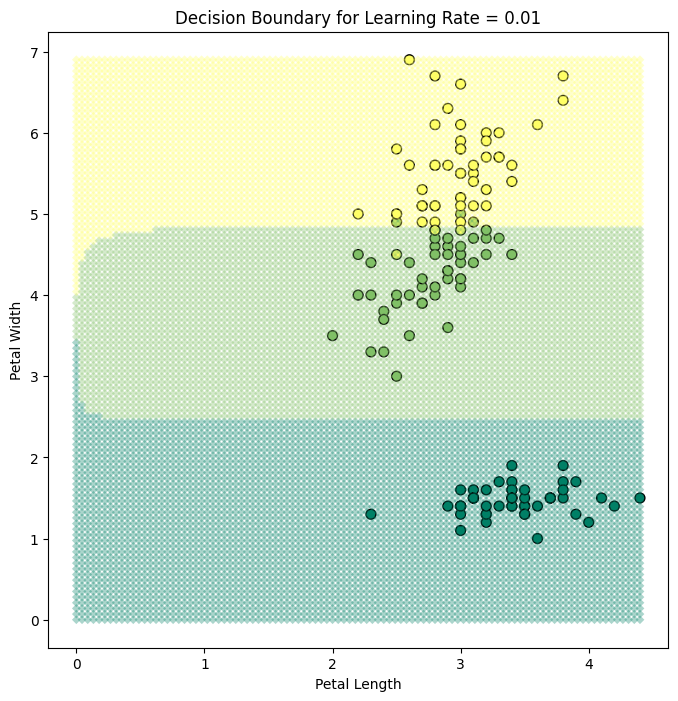

LR: 0.05, Error Rate: 0.05, F1 Score: 0.95


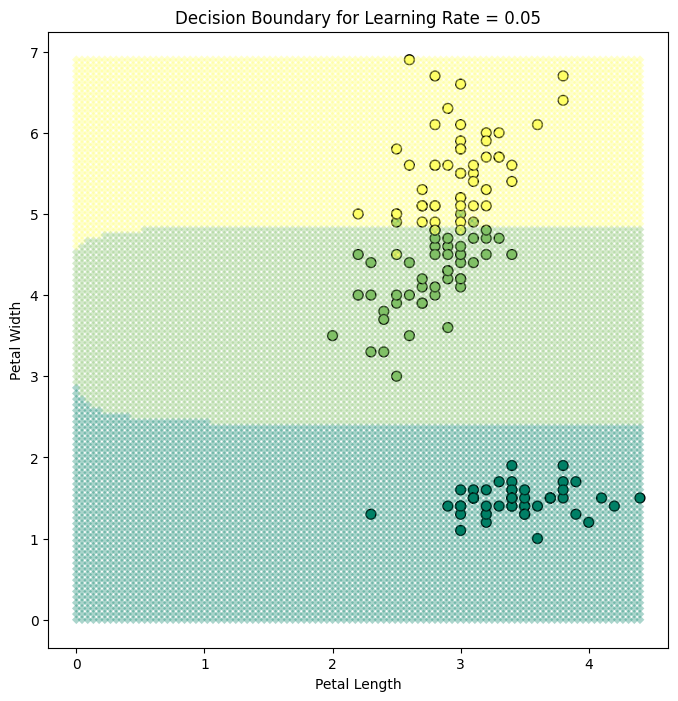

LR: 0.10, Error Rate: 0.04, F1 Score: 0.96


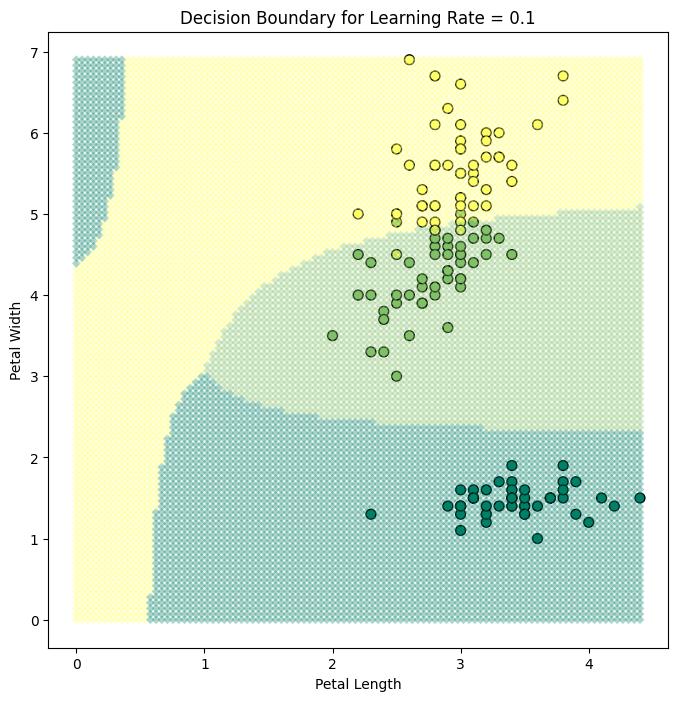

LR: 0.50, Error Rate: 0.04, F1 Score: 0.96


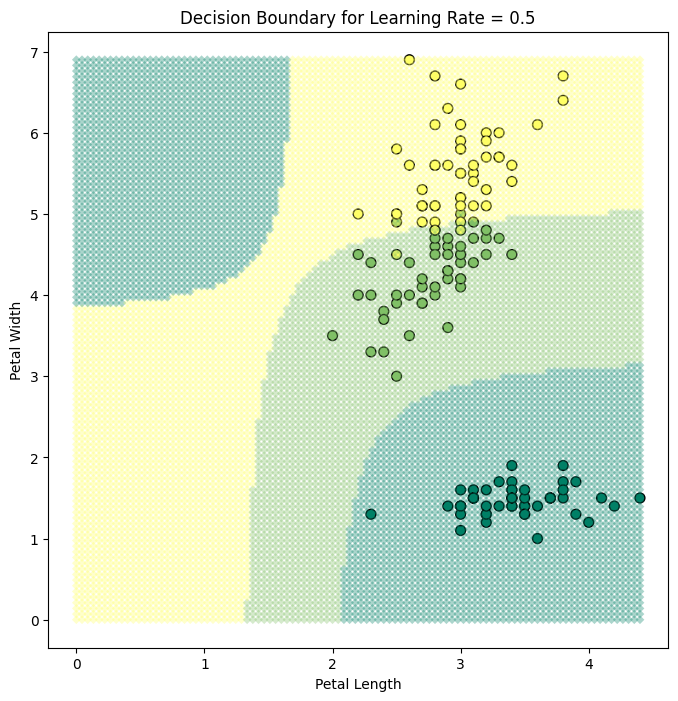

LR: 1.00, Error Rate: 0.04, F1 Score: 0.96


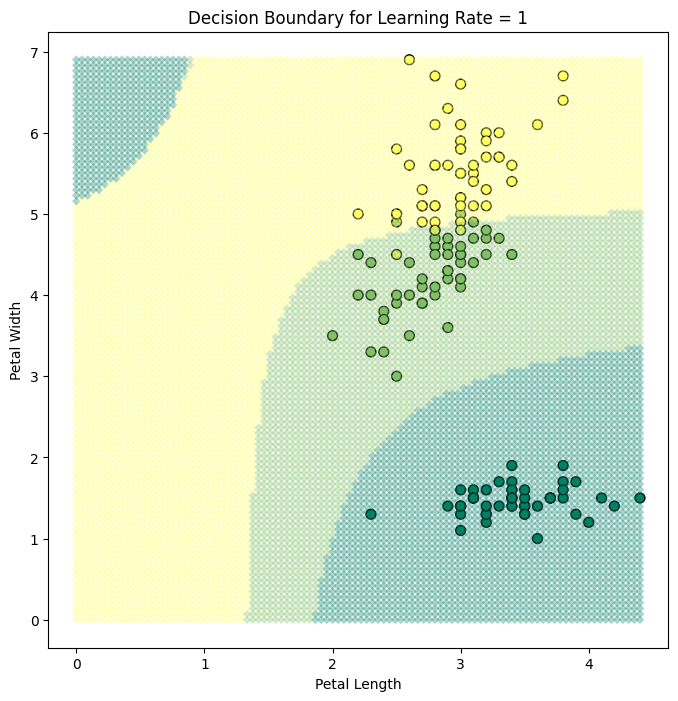

In [19]:
learning_rates = [0.01, 0.05, 0.1, 0.5, 1]
from torchmetrics import F1Score

f1 = F1Score(num_classes=num_class, average='weighted', task='multiclass')

for learning_rate in learning_rates:
    # Reinitialize cut_points and leaf_score for each learning rate
    cut_points_list = [torch.rand([i], requires_grad=True) for i in num_cut]
    leaf_score = torch.rand([num_leaf, num_class], requires_grad=True)

    # Create a new optimizer with the current learning rate
    optimizer = torch.optim.Adam(cut_points_list + [leaf_score], lr=learning_rate)
    
    for i in range(2000):
        optimizer.zero_grad()
        y_pred = nn_decision_tree(x, cut_points_list, leaf_score, temperature=0.1)
        loss = loss_function(y_pred, y)
        loss.backward()
        optimizer.step()

    # After training, check the error rate
    error_rate = 1 - np.mean(np.argmax(y_pred.detach().numpy(), axis=1) == np.argmax(_y, axis=1))
    f1_score = f1(torch.softmax(y_pred, dim=1), y).item()
    print(f"LR: {learning_rate:.2f}, Error Rate: {error_rate:.2f}, F1 Score: {f1_score:.2f}")
        # Generate predictions for the sample
    sample_x0 = np.repeat(np.linspace(0, np.max(_x[:, 0]), 100), 100).reshape(-1, 1)
    sample_x1 = np.tile(np.linspace(0, np.max(_x[:, 1]), 100).reshape(-1, 1), [100, 1])
    sample_x = np.hstack([sample_x0, sample_x1])
    sample_y_pred = nn_decision_tree(torch.from_numpy(sample_x.astype(np.float32)), cut_points_list, leaf_score, temperature=0.1)
    sample_label = np.argmax(sample_y_pred.detach().numpy(), axis=1)

    # Plot the decision boundaries for the current learning rate
    plt.figure(figsize=(8, 8))
    plt.scatter(_x[:, 0], _x[:, 1], c=np.argmax(_y, axis=1), marker='o', s=50, cmap='summer', edgecolors='black')
    plt.scatter(sample_x0.flatten(), sample_x1.flatten(), c=sample_label.flatten(), marker='D', s=20, cmap='summer', edgecolors='none', alpha=0.33)
    plt.title(f'Decision Boundary for Learning Rate = {learning_rate}')
    plt.xlabel('Petal Length')
    plt.ylabel('Petal Width')
    plt.show()


### Implementing train/test splits + testing with different learning rates

C:\Users\Dshen\AppData\Local\Temp\ipykernel_90328\2336026708.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_tensor = torch.tensor(x).float()
C:\Users\Dshen\AppData\Local\Temp\ipykernel_90328\2336026708.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_tensor = torch.tensor(y).long()


Learning Rate: 0.001, F1 Score: 0.6622, Accuracy: 73.33%
Learning Rate: 0.005, F1 Score: 1.0000, Accuracy: 100.00%
Learning Rate: 0.01, F1 Score: 1.0000, Accuracy: 100.00%
Learning Rate: 0.05, F1 Score: 0.9668, Accuracy: 96.67%
Learning Rate: 0.1, F1 Score: 0.9668, Accuracy: 96.67%
Learning Rate: 0.5, F1 Score: 0.9333, Accuracy: 93.33%
Learning Rate: 1, F1 Score: 0.9333, Accuracy: 93.33%


C:\Users\Dshen\AppData\Local\Temp\ipykernel_90328\2336026708.py:76: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test.numpy(), marker='x', s=50, cmap='summer', edgecolors='black', label='Test Data')


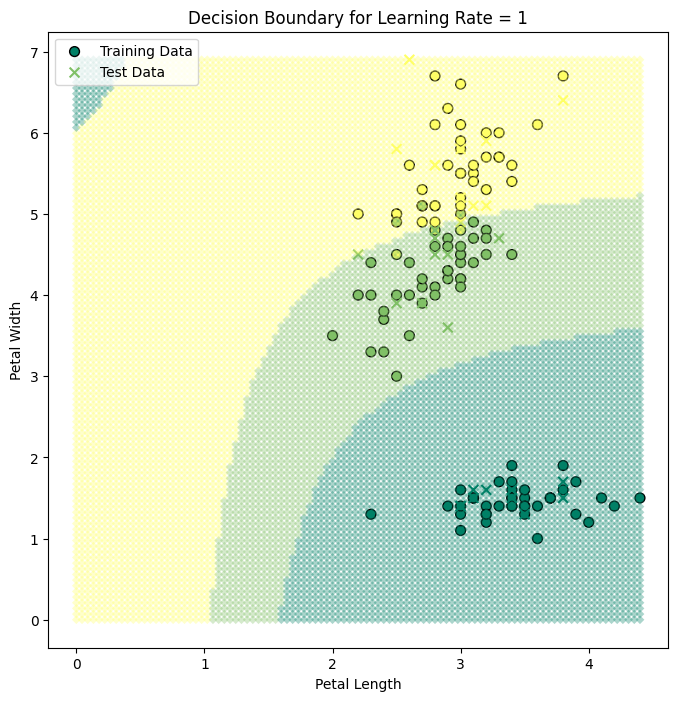

In [65]:
import torch
from torch.optim import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score

# Assuming nn_decision_tree is your model function
# Assuming x and y are your full dataset and labels as NumPy arrays

# Convert data to torch tensors
x_tensor = torch.tensor(x).float()
y_tensor = torch.tensor(y).long() 

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x_tensor, y_tensor, test_size=0.2, random_state=42)

# Define the number of cut points and other configurations
num_cut = [1, 1]  # Example for "Petal length" and "Petal width"
num_leaf = np.prod(np.array(num_cut) + 1)
num_class = 3

learning_rates = [0.001,0.005,0.01, 0.05, 0.1, 0.5, 1]
for learning_rate in learning_rates:
    # Reinitialize the model parameters
    cut_points_list = [torch.rand([i], requires_grad=True) for i in num_cut]
    leaf_score = torch.rand([num_leaf, num_class], requires_grad=True)

    # Optimizer
    optimizer = Adam(cut_points_list + [leaf_score], lr=learning_rate)

    # Training loop
    for epoch in range(2000):
        optimizer.zero_grad()
        y_pred = nn_decision_tree(x_train, cut_points_list, leaf_score)
        loss = torch.nn.functional.cross_entropy(y_pred, y_train)
        loss.backward()
        optimizer.step()

    # Evaluation
    y_pred_test = nn_decision_tree(x_test, cut_points_list, leaf_score)
    test_predictions = torch.argmax(y_pred_test, axis=1)
    f1_score_value = f1_score(y_test.numpy(), test_predictions.numpy(), average='weighted')
    accuracy_value = (accuracy_score(y_test.numpy(), test_predictions.numpy())) * 100
    print(f"Learning Rate: {learning_rate}, F1 Score: {f1_score_value:.4f}, Accuracy: {accuracy_value:.2f}%")


"""
    print(f"LR: {learning_rate}, Error Rate: {error_rate}, F1 Score: {f1_score}")
        # Generate predictions for the sample
    sample_x0 = np.repeat(np.linspace(0, np.max(_x[:, 0]), 100), 100).reshape(-1, 1)
    sample_x1 = np.tile(np.linspace(0, np.max(_x[:, 1]), 100).reshape(-1, 1), [100, 1])
    sample_x = np.hstack([sample_x0, sample_x1])
    sample_y_pred = nn_decision_tree(torch.from_numpy(sample_x.astype(np.float32)), cut_points_list, leaf_score, temperature=0.1)
    sample_label = np.argmax(sample_y_pred.detach().numpy(), axis=1)

    # Plot the decision boundaries for the current learning rate
    plt.figure(figsize=(8, 8))
    plt.scatter(_x[:, 0], _x[:, 1], c=np.argmax(_y, axis=1), marker='o', s=50, cmap='summer', edgecolors='black')
    plt.scatter(sample_x0.flatten(), sample_x1.flatten(), c=sample_label.flatten(), marker='D', s=20, cmap='summer', edgecolors='none', alpha=0.33)
    plt.title(f'Decision Boundary for Learning Rate = {learning_rate}')
    plt.xlabel('Petal Length')
    plt.ylabel('Petal Width')
    plt.show()
"""
sample_x0 = np.repeat(np.linspace(0, np.max(_x[:, 0]), 100), 100).reshape(-1, 1)
sample_x1 = np.tile(np.linspace(0, np.max(_x[:, 1]), 100).reshape(-1, 1), [100, 1])
sample_x = np.hstack([sample_x0, sample_x1])
sample_y_pred = nn_decision_tree(torch.from_numpy(sample_x.astype(np.float32)), cut_points_list, leaf_score, temperature=0.1)
sample_label = np.argmax(sample_y_pred.detach().numpy(), axis=1)

plt.figure(figsize=(8, 8))

# Training data
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train.numpy(), marker='o', s=50, cmap='summer', edgecolors='black', label='Training Data')

# Test data
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test.numpy(), marker='x', s=50, cmap='summer', edgecolors='black', label='Test Data')

# Decision boundaries
plt.scatter(sample_x0.flatten(), sample_x1.flatten(), c=sample_label.flatten(), marker='D', s=20, cmap='summer', edgecolors='none', alpha=0.33)

plt.title(f'Decision Boundary for Learning Rate = {learning_rate}')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()


### Testing with different optimizers

In [63]:
import torch
from torch.optim import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score


optimizers = {
    'SGD': torch.optim.SGD(cut_points_list + [leaf_score], lr=0.01),
    'Momentum': torch.optim.SGD(cut_points_list + [leaf_score], lr=0.01, momentum=0.9),
    'Adagrad': torch.optim.Adagrad(cut_points_list + [leaf_score], lr=0.01),
    'RMSprop': torch.optim.RMSprop(cut_points_list + [leaf_score], lr=0.01),
    'Adam': torch.optim.Adam(cut_points_list + [leaf_score], lr=0.01)
}
# Assuming nn_decision_tree is your model function
# Assuming x and y are your full dataset and labels as NumPy arrays

# Convert data to torch tensors
x_tensor = torch.tensor(x).float()
y_tensor = torch.tensor(y).long() 

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x_tensor, y_tensor, test_size=0.2, random_state=42)

# Define the number of cut points and other configurations
num_cut = [1, 1]  # Example for "Petal length" and "Petal width"
num_leaf = np.prod(np.array(num_cut) + 1)
num_class = 3


for opt_name, optimizer in optimizers.items():
    # Reset the parameters to their initial random state
    for cp in cut_points_list:
        cp.data = torch.rand(cp.shape)
    leaf_score.data = torch.rand(leaf_score.shape)

    # Training loop
    for epoch in range(1000):
        optimizer.zero_grad()
        y_pred = nn_decision_tree(x_train, cut_points_list, leaf_score)
        loss = torch.nn.functional.cross_entropy(y_pred, y_train)
        loss.backward()
        optimizer.step()

    # Evaluation
    y_pred_test = nn_decision_tree(x_test, cut_points_list, leaf_score)
    test_predictions = torch.argmax(y_pred_test, axis=1)
    f1_score_value = f1_score(y_test.numpy(), test_predictions.numpy(), average='weighted')
    accuracy_value = (accuracy_score(y_test.numpy(), test_predictions.numpy())) * 100
    print(f"Optimizer: {opt_name}, F1 Score: {f1_score_value:.4f}. Accuracy: {accuracy_value:.2f}%")


"""
    print(f"LR: {learning_rate}, Error Rate: {error_rate}, F1 Score: {f1_score}")
        # Generate predictions for the sample
    sample_x0 = np.repeat(np.linspace(0, np.max(_x[:, 0]), 100), 100).reshape(-1, 1)
    sample_x1 = np.tile(np.linspace(0, np.max(_x[:, 1]), 100).reshape(-1, 1), [100, 1])
    sample_x = np.hstack([sample_x0, sample_x1])
    sample_y_pred = nn_decision_tree(torch.from_numpy(sample_x.astype(np.float32)), cut_points_list, leaf_score, temperature=0.1)
    sample_label = np.argmax(sample_y_pred.detach().numpy(), axis=1)

    # Plot the decision boundaries for the current learning rate
    plt.figure(figsize=(8, 8))
    plt.scatter(_x[:, 0], _x[:, 1], c=np.argmax(_y, axis=1), marker='o', s=50, cmap='summer', edgecolors='black')
    plt.scatter(sample_x0.flatten(), sample_x1.flatten(), c=sample_label.flatten(), marker='D', s=20, cmap='summer', edgecolors='none', alpha=0.33)
    plt.title(f'Decision Boundary for Learning Rate = {learning_rate}')
    plt.xlabel('Petal Length')
    plt.ylabel('Petal Width')
    plt.show()
"""
# sample_x0 = np.repeat(np.linspace(0, np.max(_x[:, 0]), 100), 100).reshape(-1, 1)
# sample_x1 = np.tile(np.linspace(0, np.max(_x[:, 1]), 100).reshape(-1, 1), [100, 1])
# sample_x = np.hstack([sample_x0, sample_x1])
# sample_y_pred = nn_decision_tree(torch.from_numpy(sample_x.astype(np.float32)), cut_points_list, leaf_score, temperature=0.1)
# sample_label = np.argmax(sample_y_pred.detach().numpy(), axis=1)

# plt.figure(figsize=(8, 8))

# # Training data
# plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train.numpy(), marker='o', s=50, cmap='summer', edgecolors='black', label='Training Data')

# # Test data
# plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test.numpy(), marker='x', s=50, cmap='summer', edgecolors='black', label='Test Data')

# # Decision boundaries
# plt.scatter(sample_x0.flatten(), sample_x1.flatten(), c=sample_label.flatten(), marker='D', s=20, cmap='summer', edgecolors='none', alpha=0.33)

# plt.title(f'Decision Boundary for Learning Rate = {learning_rate}')
# plt.xlabel('Petal Length')
# plt.ylabel('Petal Width')
# plt.legend()
# plt.show()



C:\Users\Dshen\AppData\Local\Temp\ipykernel_90328\2331845158.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_tensor = torch.tensor(x).float()
C:\Users\Dshen\AppData\Local\Temp\ipykernel_90328\2331845158.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_tensor = torch.tensor(y).long()


Optimizer: SGD, F1 Score: 0.9668. Accuracy: 96.67%
Optimizer: Momentum, F1 Score: 0.9333. Accuracy: 93.33%
Optimizer: Adagrad, F1 Score: 0.6162. Accuracy: 63.33%
Optimizer: RMSprop, F1 Score: 0.9668. Accuracy: 96.67%
Optimizer: Adam, F1 Score: 1.0000. Accuracy: 100.00%


'\n    print(f"LR: {learning_rate}, Error Rate: {error_rate}, F1 Score: {f1_score}")\n        # Generate predictions for the sample\n    sample_x0 = np.repeat(np.linspace(0, np.max(_x[:, 0]), 100), 100).reshape(-1, 1)\n    sample_x1 = np.tile(np.linspace(0, np.max(_x[:, 1]), 100).reshape(-1, 1), [100, 1])\n    sample_x = np.hstack([sample_x0, sample_x1])\n    sample_y_pred = nn_decision_tree(torch.from_numpy(sample_x.astype(np.float32)), cut_points_list, leaf_score, temperature=0.1)\n    sample_label = np.argmax(sample_y_pred.detach().numpy(), axis=1)\n\n    # Plot the decision boundaries for the current learning rate\n    plt.figure(figsize=(8, 8))\n    plt.scatter(_x[:, 0], _x[:, 1], c=np.argmax(_y, axis=1), marker=\'o\', s=50, cmap=\'summer\', edgecolors=\'black\')\n    plt.scatter(sample_x0.flatten(), sample_x1.flatten(), c=sample_label.flatten(), marker=\'D\', s=20, cmap=\'summer\', edgecolors=\'none\', alpha=0.33)\n    plt.title(f\'Decision Boundary for Learning Rate = {learning_

### Testing the different number of cut points

C:\Users\Dshen\AppData\Local\Temp\ipykernel_90328\3984396658.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_tensor = torch.tensor(x).float()
C:\Users\Dshen\AppData\Local\Temp\ipykernel_90328\3984396658.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_tensor = torch.tensor(y).long()


Learning Rate: 0.01, Num of Cut Points 1,  F1 Score: 1.0000, Accuracy: 100.00%
Learning Rate: 0.01, Num of Cut Points 2,  F1 Score: 1.0000, Accuracy: 100.00%
Learning Rate: 0.01, Num of Cut Points 3,  F1 Score: 0.9668, Accuracy: 96.67%
Learning Rate: 0.01, Num of Cut Points 4,  F1 Score: 0.9668, Accuracy: 96.67%
Learning Rate: 0.01, Num of Cut Points 5,  F1 Score: 0.9668, Accuracy: 96.67%


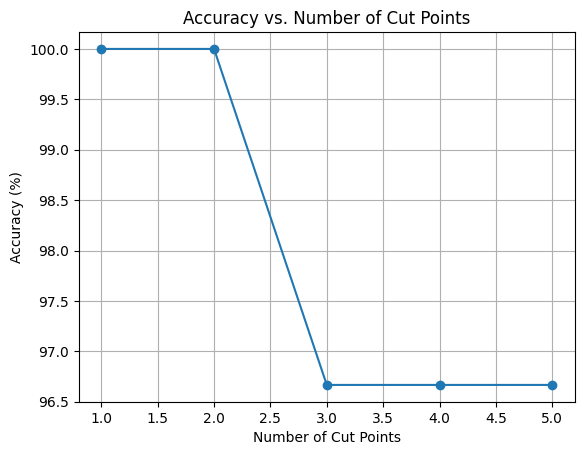

In [73]:
import matplotlib.pyplot as plt 
import torch
from torch.optim import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score

# Assuming nn_decision_tree is your model function
# Assuming x and y are your full dataset and labels as NumPy arrays

# Convert data to torch tensors
x_tensor = torch.tensor(x).float()
y_tensor = torch.tensor(y).long() 

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x_tensor, y_tensor, test_size=0.2, random_state=42)

# Define the range of cut points to experiment with
cut_points_options = [1, 2, 3, 4, 5]
accuracies = []

for num_cut_points in cut_points_options:
    # Define the number of cut points and other configurations
    num_cut = [num_cut_points] * 2  # Assuming 2 features for simplicity
    num_leaf = np.prod(np.array(num_cut) + 1)
    num_class = 3  # Update this based on your dataset

    cut_points_list = [torch.rand([i], requires_grad=True) for i in num_cut]
    leaf_score = torch.rand([num_leaf, num_class], requires_grad=True)

    # Optimizer
    optimizer = Adam(cut_points_list + [leaf_score], lr=0.01)

    # Training loop
    for epoch in range(2000):
        optimizer.zero_grad()
        y_pred = nn_decision_tree(x_train, cut_points_list, leaf_score)
        loss = torch.nn.functional.cross_entropy(y_pred, y_train)
        loss.backward()
        optimizer.step()

    # Evaluation
    y_pred_test = nn_decision_tree(x_test, cut_points_list, leaf_score)
    test_predictions = torch.argmax(y_pred_test, axis=1)
    f1_score_value = f1_score(y_test.numpy(), test_predictions.numpy(), average='weighted')
    accuracy_value = (accuracy_score(y_test.numpy(), test_predictions.numpy())) * 100
    accuracies.append(accuracy_value)
    print(f"Learning Rate: 0.01, Num of Cut Points {num_cut_points},  F1 Score: {f1_score_value:.4f}, Accuracy: {accuracy_value:.2f}%")


# Now plot the accuracies against the number of cut points
plt.plot(cut_points_options, accuracies, marker='o')
plt.title('Accuracy vs. Number of Cut Points')
plt.xlabel('Number of Cut Points')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.show()

   

    

### Experiments with Haberman's Survival Dataset

In [33]:
import pandas as pd

# Replace 'comma' with the actual delimiter if it's not a comma
data = pd.read_csv("C:\\Users\\Dshen\\Desktop\\github\\comp551mp4\\COMP551_Mini4\\datasets\\haberman+s+survival\\haberman.data", delimiter=',', header=None, names = ['age', 'year_op', 'num_of_nodes', 'class'])

In [34]:
data

age  year_op  num_of_nodes  class
0     30       64             1      1
1     30       62             3      1
2     30       65             0      1
3     31       59             2      1
4     31       65             4      1
..   ...      ...           ...    ...
301   75       62             1      1
302   76       67             0      1
303   77       65             3      1
304   78       65             1      2
305   83       58             2      2

[306 rows x 4 columns]

In [35]:
data.loc[1]

age             30
year_op         62
num_of_nodes     3
class            1
Name: 1, dtype: int64

In [53]:
import numpy as np
import pandas as pd
import torch
from torch.optim import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Assuming the last column is the target variable
x = data.iloc[:, [0, 2]].values  
y = data.iloc[:, -1].values

# Assuming nn_decision_tree is your model function
# Define it or import it from your module

# Convert data to torch tensors
x_tensor = torch.tensor(x).float()
y_tensor = torch.tensor(y - 1).long()  # Subtract 1 here if your labels start at 1

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x_tensor, y_tensor, test_size=0.2, random_state=42)

# Define the number of cut points and other configurations
# Adjust these numbers based on your actual data and model requirements
num_features = x_train.shape[1]  # Number of features
num_cut = [1] * num_features  # Placeholder: one cut per feature
num_leaf = np.prod(np.array(num_cut) + 1)
num_class = len(np.unique(y_tensor))  # Number of classes

learning_rates = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]
for learning_rate in learning_rates:
    # Reinitialize the model parameters
    cut_points_list = [torch.rand([i], requires_grad=True) for i in num_cut]
    leaf_score = torch.rand([num_leaf, num_class], requires_grad=True)

    # Optimizer
    optimizer = Adam(cut_points_list + [leaf_score], lr=learning_rate)

    # Training loop
    for epoch in range(1000):
        optimizer.zero_grad()
        y_pred = nn_decision_tree(x_train, cut_points_list, leaf_score)
        loss = torch.nn.functional.cross_entropy(y_pred, y_train)
        loss.backward()
        optimizer.step()

    # Evaluation
    y_pred_test = nn_decision_tree(x_test, cut_points_list, leaf_score)
    test_predictions = torch.argmax(y_pred_test, axis=1)
    f1_score_value = f1_score(y_test.numpy(), test_predictions.numpy(), average='weighted')
    accuracy_value = accuracy_score(y_test.numpy(), test_predictions.numpy())
    print(f"Learning Rate: {learning_rate}, F1 Score: {f1_score_value:.4f}, Accuracy: {accuracy_value:.4f}")

Learning Rate: 0.001, F1 Score: 0.6161, Accuracy: 0.6774
Learning Rate: 0.005, F1 Score: 0.6683, Accuracy: 0.6613
Learning Rate: 0.01, F1 Score: 0.5892, Accuracy: 0.7097
Learning Rate: 0.05, F1 Score: 0.5892, Accuracy: 0.7097
Learning Rate: 0.1, F1 Score: 0.6432, Accuracy: 0.6290
Learning Rate: 0.5, F1 Score: 0.4842, Accuracy: 0.4677
Learning Rate: 1, F1 Score: 0.6639, Accuracy: 0.6613


### Making Sure of Optimal LR

In [57]:
import numpy as np
import pandas as pd
import torch
from torch.optim import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Assuming the last column is the target variable
x = data.iloc[:, [0, 2]].values  
y = data.iloc[:, -1].values

# Assuming nn_decision_tree is your model function
# Define it or import it from your module

# Convert data to torch tensors
x_tensor = torch.tensor(x).float()
y_tensor = torch.tensor(y - 1).long()  # Subtract 1 here if your labels start at 1

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x_tensor, y_tensor, test_size=0.2, random_state=42)

# Define the number of cut points and other configurations
# Adjust these numbers based on your actual data and model requirements
num_features = x_train.shape[1]  # Number of features
num_cut = [1] * num_features  # Placeholder: one cut per feature
num_leaf = np.prod(np.array(num_cut) + 1)
num_class = len(np.unique(y_tensor))  # Number of classes

learning_rates = [0.01]
for learning_rate in learning_rates:
    # Reinitialize the model parameters
    cut_points_list = [torch.rand([i], requires_grad=True) for i in num_cut]
    leaf_score = torch.rand([num_leaf, num_class], requires_grad=True)

    # Optimizer
    optimizer = Adam(cut_points_list + [leaf_score], lr=learning_rate)

    # Training loop
    for epoch in range(1000):
        optimizer.zero_grad()
        y_pred = nn_decision_tree(x_train, cut_points_list, leaf_score)
        loss = torch.nn.functional.cross_entropy(y_pred, y_train)
        loss.backward()
        optimizer.step()

    # Evaluation
    y_pred_test = nn_decision_tree(x_test, cut_points_list, leaf_score)
    test_predictions = torch.argmax(y_pred_test, axis=1)
    f1_score_value = f1_score(y_test.numpy(), test_predictions.numpy(), average='weighted')
    accuracy_value = accuracy_score(y_test.numpy(), test_predictions.numpy())
    print(f"Learning Rate: {learning_rate}, F1 Score: {f1_score_value:.4f}, Accuracy: {accuracy_value:.4f}")

Learning Rate: 0.01, F1 Score: 0.5892, Accuracy: 0.7097


### Normalized Features

In [51]:
import numpy as np
import pandas as pd
import torch
from torch.optim import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler



# Assuming the last column is the target variable
x = data.iloc[:, [0, 2]].values  
y = data.iloc[:, -1].values


# Normalize features
scaler = StandardScaler()
x_normalized = scaler.fit_transform(x)

# Assuming nn_decision_tree is your model function
# Define it or import it from your module

# Convert normalized data to torch tensors
x_tensor = torch.tensor(x_normalized).float()
y_tensor = torch.tensor(y).long() - 1  # Subtract 1 here if your labels start at 1

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x_tensor, y_tensor, test_size=0.2, random_state=42)

# Define the number of cut points and other configurations
# Adjust these numbers based on your actual data and model requirements
num_features = x_train.shape[1]  # Number of features
num_cut = [1] * num_features  # Placeholder: one cut per feature
num_leaf = np.prod(np.array(num_cut) + 1)
num_class = len(np.unique(y_tensor))  # Number of classes

learning_rates = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]
for learning_rate in learning_rates:
    # Reinitialize the model parameters
    cut_points_list = [torch.rand([i], requires_grad=True) for i in num_cut]
    leaf_score = torch.rand([num_leaf, num_class], requires_grad=True)

    # Optimizer
    optimizer = Adam(cut_points_list + [leaf_score], lr=learning_rate)

    # Training loop
    for epoch in range(1000):
        optimizer.zero_grad()
        y_pred = nn_decision_tree(x_train, cut_points_list, leaf_score)
        loss = torch.nn.functional.cross_entropy(y_pred, y_train)
        loss.backward()
        optimizer.step()

    # Evaluation
    y_pred_test = nn_decision_tree(x_test, cut_points_list, leaf_score)
    test_predictions = torch.argmax(y_pred_test, axis=1)
    f1_score_value = f1_score(y_test.numpy(), test_predictions.numpy(), average='weighted')
    accuracy_value = accuracy_score(y_test.numpy(), test_predictions.numpy())
    print(f"Learning Rate: {learning_rate}, Accuracy: {accuracy_value:.4f}")
    print(f"Learning Rate: {learning_rate}, F1 Score: {f1_score_value:.4f}")

Learning Rate: 0.001, Accuracy: 0.7097
Learning Rate: 0.001, F1 Score: 0.6687
Learning Rate: 0.005, Accuracy: 0.6935
Learning Rate: 0.005, F1 Score: 0.6432
Learning Rate: 0.01, Accuracy: 0.6935
Learning Rate: 0.01, F1 Score: 0.6432
Learning Rate: 0.05, Accuracy: 0.6935
Learning Rate: 0.05, F1 Score: 0.6432
Learning Rate: 0.1, Accuracy: 0.6935
Learning Rate: 0.1, F1 Score: 0.6432
Learning Rate: 0.5, Accuracy: 0.7097
Learning Rate: 0.5, F1 Score: 0.6545
Learning Rate: 1, Accuracy: 0.6935
Learning Rate: 1, F1 Score: 0.6567


In [40]:
len(cut_points_list)

3

In [41]:
num_features

3

In [48]:
y

array([1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1,